<a href="https://colab.research.google.com/github/HaohanZou/dsc210-final-project/blob/main/Lyapunov_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve the Lyapunov Equation

In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import control as ct
import scipy
import sympy as sym

## Stable Dynamic Examples

### Example 1

In [ ]:
#### example 1:
# check the eigenvalues of A
A = np.array([[0, 1, 0], [-1, -1, -1], [0, 1, -1]])
np.linalg.eig(A)

# create the matrix Q that is positive definite
Q=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])

print(Q)


# Lyapunov equation A'*X+X*A=-Q

Qvectorized=-Q.flatten('F').reshape(9,1)

print(f'vec(-Q) is {Qvectorized}')

S=np.kron(np.eye(3,3),A.T)+np.kron(A.T,np.eye(3,3))

print(f'S is {S}')


Xvectorized= np.matmul(np.linalg.inv(S),Qvectorized)

print(Xvectorized)

X=Xvectorized.reshape(3,3,order='F')

# check the eigenvalues
print(f'X is {X}')
eigen_X = np.linalg.eig(X)
print(f'eigenvalues of X is {eigen_X}')

# confirm that the solution actually satisfies
# Lyapunov equation A'*X+X*A=-Q
# LHS=A'*X+X*A
# LHS+Q=0 -> equivalent form

# the Lyapunov equation
LHS=np.matmul(A.T,X)+np.matmul(X,A)

# this should be zero or close to zero if X is the
# correct solution
print(LHS+Q)

# print eigenvalues(LHS+Q)
print(f'eigenvalues are {np.linalg.eig(LHS+Q)}')

# show the expression
x, y, z = sym.symbols('x, y, z')

print(f'eigenvalues of A^T*X+X*A is {np.linalg.eig(A.T*X+X*A)}')

vector = np.array([x, y, z])
expression = np.dot(np.dot(vector.T, X), vector)
sym.simplify(expression)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
vec(-Q) is [[-1]
 [ 0]
 [ 0]
 [ 0]
 [-1]
 [ 0]
 [ 0]
 [ 0]
 [-1]]
S is [[ 0. -1.  0. -1. -0.  0.  0.  0.  0.]
 [ 1. -1.  1.  0. -1.  0.  0.  0.  0.]
 [ 0. -1. -1.  0. -0. -1.  0.  0.  0.]
 [ 1.  0.  0. -1. -1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -2.  1.  0.  1.  0.]
 [ 0.  0.  1.  0. -1. -2.  0.  0.  1.]
 [ 0.  0.  0. -1. -0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0. -1.  0.  1. -2.  1.]
 [ 0.  0.  0.  0. -0. -1.  0. -1. -2.]]
[[ 1.6]
 [ 0.5]
 [-0.3]
 [ 0.5]
 [ 0.8]
 [-0.2]
 [-0.3]
 [-0.2]
 [ 0.7]]
X is [[ 1.6  0.5 -0.3]
 [ 0.5  0.8 -0.2]
 [-0.3 -0.2  0.7]]
eigenvalues of X is (array([1.94301242, 0.63041971, 0.52656787]), array([[ 0.86178166,  0.45483798, -0.22462142],
       [ 0.42534664, -0.40660193,  0.80855124],
       [-0.27642831,  0.7923366 ,  0.54386589]]))
[[ 0.00000000e+00  1.11022302e-16 -8.32667268e-17]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16]
 [ 2.77555756e-17 -2.22044605e-16  0.00000000e+00]]
eigenvalues are (array([ 1.54794438e-17, -1.566056

1.6*x**2 + 1.0*x*y - 0.6*x*z + 0.8*y**2 - 0.4*y*z + 0.7*z**2

### Example 2

In [ ]:
### example 2:
# test of the Kronecker product in Python

Atest=np.array([[1,2],[3,4]])
Btest=np.array([[2,1],[3,4]])
Cmatrix=np.kron(Atest,Btest)

# test of vectorization
AtestVectorized=Atest.flatten('F').reshape(4,1)

np.matmul(Cmatrix,AtestVectorized)

# test of de-vectorization

Atest1=AtestVectorized.reshape(2,2,order='F')
# now test the Lyapunov Equation solution

# define a stable transfer function
tfTest = ct.zpk([1], [-1,-2,-3], gain=1)
print(tfTest)

# create a state-space model
ssTest=ct.tf2ss(tfTest)
print(ssTest)

# extract the A matrix
A=ssTest.A
# check the eigenvalues of A
np.linalg.eig(A)

# create the matrix Q that is positive definite
Q=np.array([[10, -0.2, -0.1],[-0.2, 20, -0.2],[-0.1, -0.2, 3]])


# Lyapunov equation A'*X+X*A=-Q

Qvectorized=Q.flatten('F').reshape(9,1)

S=np.kron(np.eye(3,3),A.T)+np.kron(A.T,np.eye(3,3))

Xvectorized=-np.matmul(np.linalg.inv(S),Qvectorized)

X=Xvectorized.reshape(3,3,order='F')

# check the eigenvalues
eigen_X = np.linalg.eig(X)
print(f'eigenvalues of X is {eigen_X}')

# confirm that the solution actually satisfies
# Lyapunov equation A'*X+X*A=-Q
# LHS=A'*X+X*A
# LHS+Q=0 -> equivalent form

# the Lyapunov equation
LHS=np.matmul(A.T,X)+np.matmul(X,A)

# this should be zero or close to zero if X is the
# correct solution
LHS+Q

# show the expression
x, y, z = sym.symbols('x, y, z')

vector = np.array([x, y, z])

expression = np.dot(np.dot(vector.T, X), vector)
sym.simplify(expression)


        s - 1
----------------------
s^3 + 6 s^2 + 11 s + 6

A = [[ -6. -11.  -6.]
     [  1.   0.   0.]
     [  0.   1.   0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[ 0.  1. -1.]]

D = [[0.]]

eigenvalues of X is (array([27.065524  ,  0.96160146,  8.11287454]), array([[ 0.05996335,  0.99437312, -0.08732983],
       [ 0.86169403, -0.09572664, -0.49831698],
       [ 0.5038728 ,  0.04537083,  0.86258547]]))


1.11*x**2 + 3.32*x*y + 0.5*x*z + 22.12*y**2 + 16.52*y*z + 12.91*z**2

### Example 3

In [ ]:
#### example 3:
# check the eigenvalues of A
A = np.array([[0, -1], [1, -1]])
np.linalg.eig(A)

# create the matrix Q that is positive definite
Q=np.array([[1, 0],[0, 1]])


# Lyapunov equation A'*X+X*A=-Q

Qvectorized=Q.flatten('F').reshape(4,1)

S=np.kron(np.eye(2,2),A.T)+np.kron(A.T,np.eye(2,2))
print(f'S is {S}')

Xvectorized=-np.matmul(np.linalg.inv(S),Qvectorized)
print(f'Xvectorized is {Xvectorized}')

X=Xvectorized.reshape(2,2,order='F')
print(f'X is {X}')

# check the eigenvalues
print(f'X is {X}')
eigen_X = np.linalg.eig(X)
print(f'eigenvalues of X is {eigen_X}')

# confirm that the solution actually satisfies
# Lyapunov equation A'*X+X*A=-Q
# LHS=A'*X+X*A
# LHS+Q=0 -> equivalent form

# the Lyapunov equation
LHS=np.matmul(A.T,X)+np.matmul(X,A)

# this should be zero or close to zero if X is the
# correct solution
print(LHS+Q)

# print eigenvalues(LHS+Q)
print(f'eigenvalues are {np.linalg.eig(LHS+Q)}')

# show the expression
x, y = sym.symbols('x, y')

vector = np.array([x, y])

expression = np.dot(np.dot(vector.T, X), vector)
sym.simplify(expression)


S is [[ 0.  1.  1.  0.]
 [-1. -1.  0.  1.]
 [-1.  0. -1.  1.]
 [-0. -1. -1. -2.]]
Xvectorized is [[ 1.5]
 [-0.5]
 [-0.5]
 [ 1. ]]
X is [[ 1.5 -0.5]
 [-0.5  1. ]]
X is [[ 1.5 -0.5]
 [-0.5  1. ]]
eigenvalues of X is (array([1.80901699, 0.69098301]), array([[ 0.85065081,  0.52573111],
       [-0.52573111,  0.85065081]]))
[[0. 0.]
 [0. 0.]]
eigenvalues are (array([0., 0.]), array([[1., 0.],
       [0., 1.]]))


-1.0*x**2 - 1.0*y**2

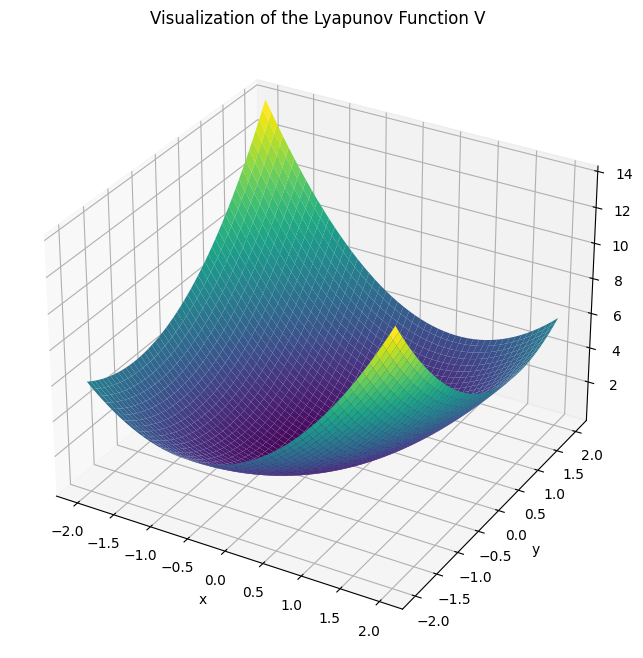

In [ ]:
### visualize example 3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a grid of values for x and y
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
x, y = np.meshgrid(x, y)

# Calculate the values of the Lyapunov function V
V = 1.5*x**2 - 1.0*x*y + 1.0*y**2

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, V, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.set_title('Visualization of the Lyapunov Function V')

# Show the plot
plt.show()


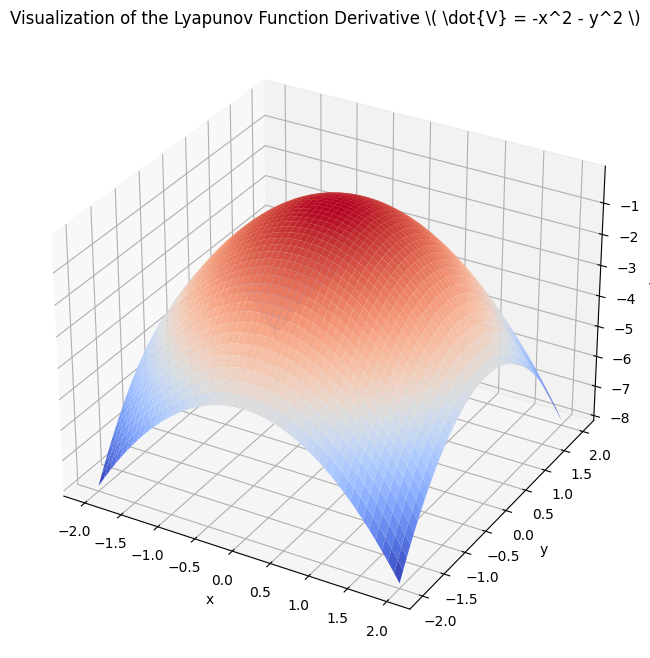

In [24]:
# Visualization of the Lyapunov function derivative V_dot = -x^2 - y^2 as given in the example
# Create a grid of values for x and y
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)

# Calculate the values of the Lyapunov function derivative V_dot
V_dot_vals = -x_vals**2 - y_vals**2

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_vals, y_vals, V_dot_vals, cmap='coolwarm', edgecolor='none')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel("V'")
ax.set_title("Visualization of the Lyapunov Function Derivative \( \dot{V} = -x^2 - y^2 \)")

# Show the plot
plt.show()


## Example 4

In [ ]:
# #### example 4
# # check the eigenvalues of A
# A = np.array([[0,  0, 1, 0],[0, 0, 0, 1], [-9.81 / 4 - 0.3, 0.3, 0, 0], [0.3, -9.81/4 - 0.3, 0, 0]])
# np.linalg.eig(A)

# # create the matrix Q that is positive definite
# Q= np.array([[1, 0, 0, 0], [0, 1, 0,0], [0, 0, 2, 0], [0, 0, 0, 2]])

# print(Q)


# # Lyapunov equation A'*X+X*A=-Q

# Qvectorized=-Q.flatten('F').reshape(16,1)

# print(f'vec(-Q) is {Qvectorized}')

# S=np.kron(np.eye(4,4),A.T)+np.kron(A.T,np.eye(4,4))

# print(f'S is {S}')


# Xvectorized= np.matmul(np.linalg.inv(S),Qvectorized)

# print(Xvectorized)

# X=Xvectorized.reshape(4,4,order='F')

# # check the eigenvalues
# print(f'X is {X}')
# eigen_X = np.linalg.eig(X)
# print(f'eigenvalues of X is {eigen_X}')

# # confirm that the solution actually satisfies
# # Lyapunov equation A'*X+X*A=-Q
# # LHS=A'*X+X*A
# # LHS+Q=0 -> equivalent form

# # the Lyapunov equation
# LHS=np.matmul(A.T,X)+np.matmul(X,A)

# # this should be zero or close to zero if X is the
# # correct solution
# print(LHS+Q)

# # print eigenvalues(LHS+Q)
# print(f'eigenvalues are {np.linalg.eig(LHS+Q)}')

# # show the expression
# x, y, z = sym.symbols('x, y, z')

# print(f'eigenvalues of A^T*X+X*A is {np.linalg.eig(A.T*X+X*A)}')

# vector = np.array([x, y, z])
# expression = np.dot(np.dot(vector.T, X), vector)
# sym.simplify(expression)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 2]]
vec(-Q) is [[-1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [-1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [-2]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [-2]]
S is [[ 0.      0.     -2.7525  0.3     0.      0.      0.      0.     -2.7525
   0.     -0.      0.      0.3     0.      0.      0.    ]
 [ 0.      0.      0.3    -2.7525  0.      0.      0.      0.      0.
  -2.7525  0.     -0.      0.      0.3     0.      0.    ]
 [ 1.      0.      0.      0.      0.      0.      0.      0.      0.
   0.     -2.7525  0.      0.      0.      0.3     0.    ]
 [ 0.      1.      0.      0.      0.      0.      0.      0.      0.
   0.      0.     -2.7525  0.      0.      0.      0.3   ]
 [ 0.      0.      0.      0.      0.      0.     -2.7525  0.3     0.3
   0.      0.      0.     -2.7525  0.     -0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.3    -2.7525  0.
   0.3     0.      0.      0.     -2.7525  0.     -0.    ]
 [ 0.      0.      0.      0.      1.      0.      0.      0.  

LinAlgError: ignored

## Unstable Dynamic Examples

## Example 1

In [ ]:
#### counter example 4:
# check the eigenvalues of A
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
np.linalg.eig(A)

# create the matrix Q that is positive definite
Q=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])

print(Q)


# Lyapunov equation A'*X+X*A=-Q

Qvectorized=-Q.flatten('F').reshape(9,1)

print(f'vec(-Q) is {Qvectorized}')

S=np.kron(np.eye(3,3),A.T)+np.kron(A.T,np.eye(3,3))

print(f'S is {S}')


Xvectorized= np.matmul(np.linalg.inv(S),Qvectorized)

print(Xvectorized)

X=Xvectorized.reshape(3,3,order='F')

# check the eigenvalues
print(f'X is {X}')
eigen_X = np.linalg.eig(X)
print(f'eigenvalues of X is {eigen_X}')

# confirm that the solution actually satisfies
# Lyapunov equation A'*X+X*A=-Q
# LHS=A'*X+X*A
# LHS+Q=0 -> equivalent form

# the Lyapunov equation
LHS=np.matmul(A.T,X)+np.matmul(X,A)

# this should be zero or close to zero if X is the
# correct solution
print(LHS+Q)

# print eigenvalues(LHS+Q)
print(f'eigenvalues are {np.linalg.eig(LHS+Q)}')

# show the expression
x, y, z = sym.symbols('x, y, z')

print(f'eigenvalues of A^T*X+X*A is {np.linalg.eig(A.T*X+X*A)}')

vector = np.array([x, y, z])
expression = np.dot(np.dot(vector.T, X), vector)
sym.simplify(expression)